In [29]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from tqdm import tqdm

In [30]:
calibration = cv2.imread("calibration2.bmp", 1)
hoge = cv2.imread("hoge2.bmp", 0)

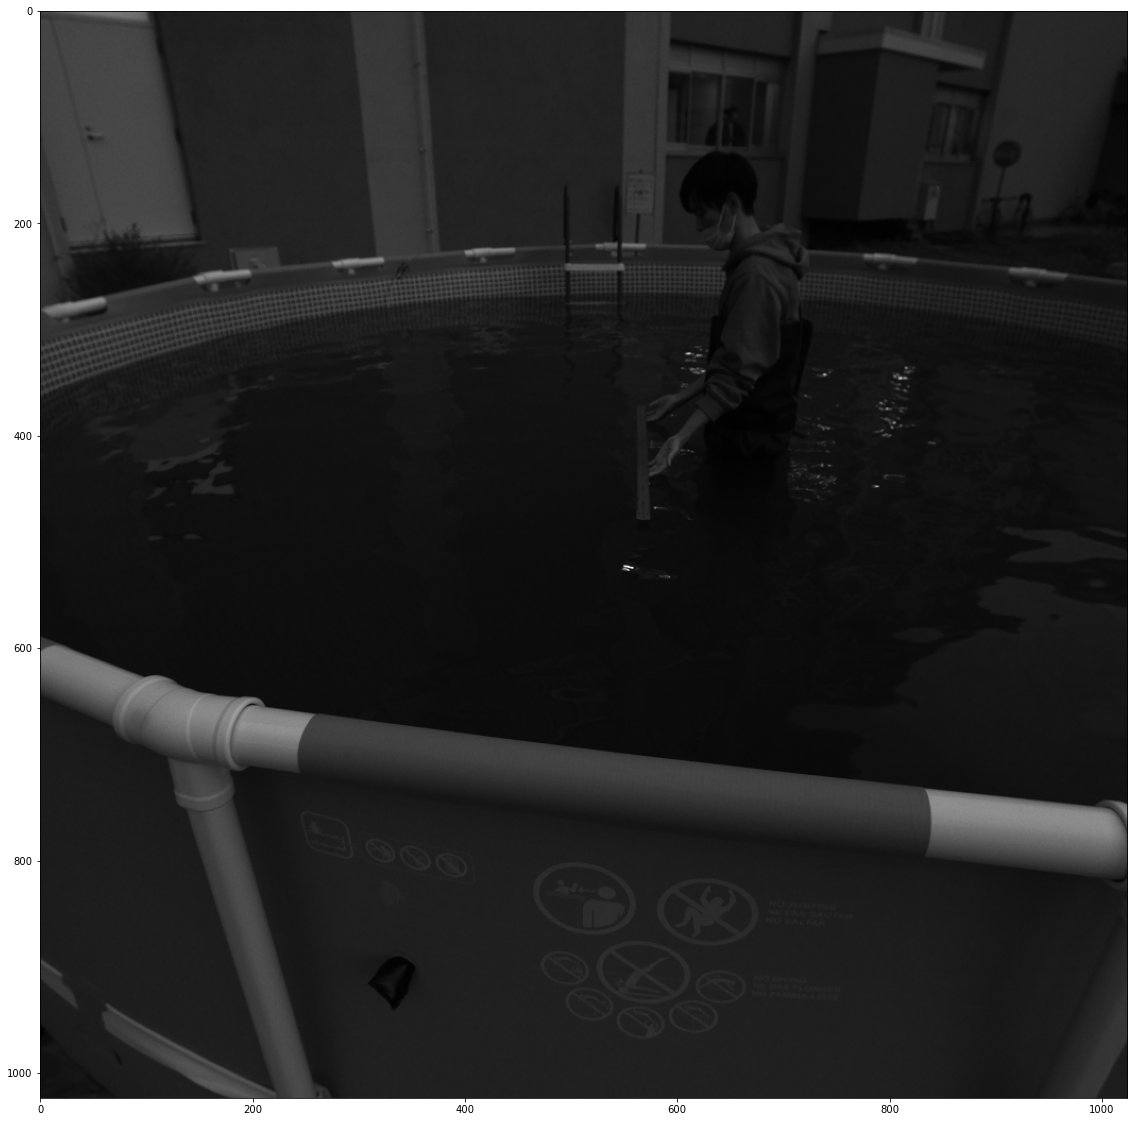

In [31]:
_, ax = plt.subplots(figsize=(20, 20))
ax.imshow(calibration, cmap='gray')

In [32]:
mask = cv2.imread("m.bmp", 0)
img_0_masked = cv2.bitwise_and(hoge, hoge, mask=mask)

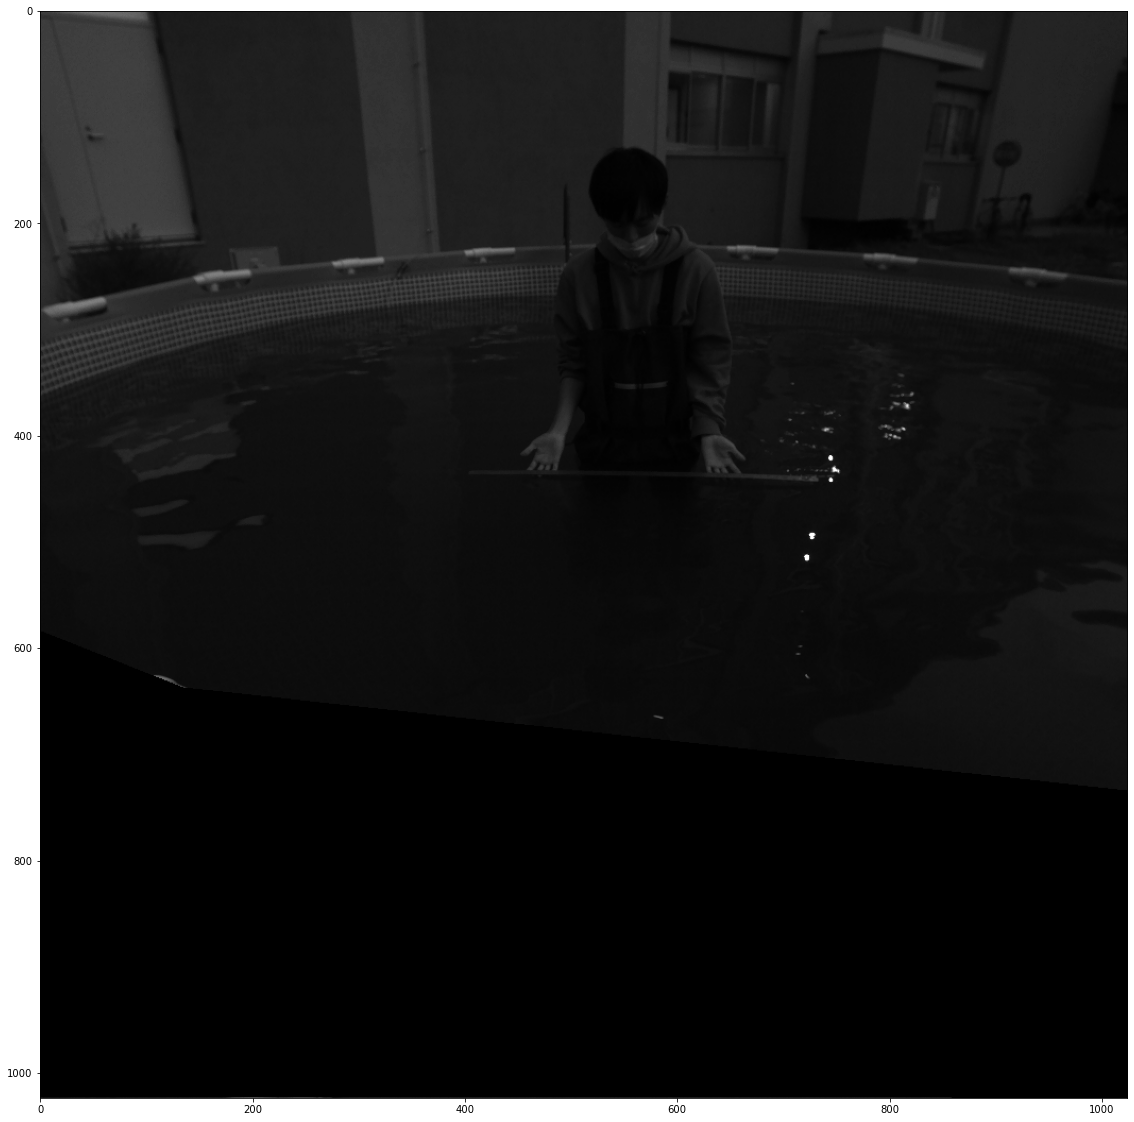

In [33]:
_, ax = plt.subplots(figsize=(20, 20))
ax.imshow(img_0_masked, cmap='gray')

In [34]:
p_original = np.float32([[404, 434], [728, 440], [360, 515], [772, 518], ])
p_trans = np.float32([[800, 1100], [1320, 1100], [800, 1400], [1320, 1400]])
M = cv2.getPerspectiveTransform(p_original, p_trans)

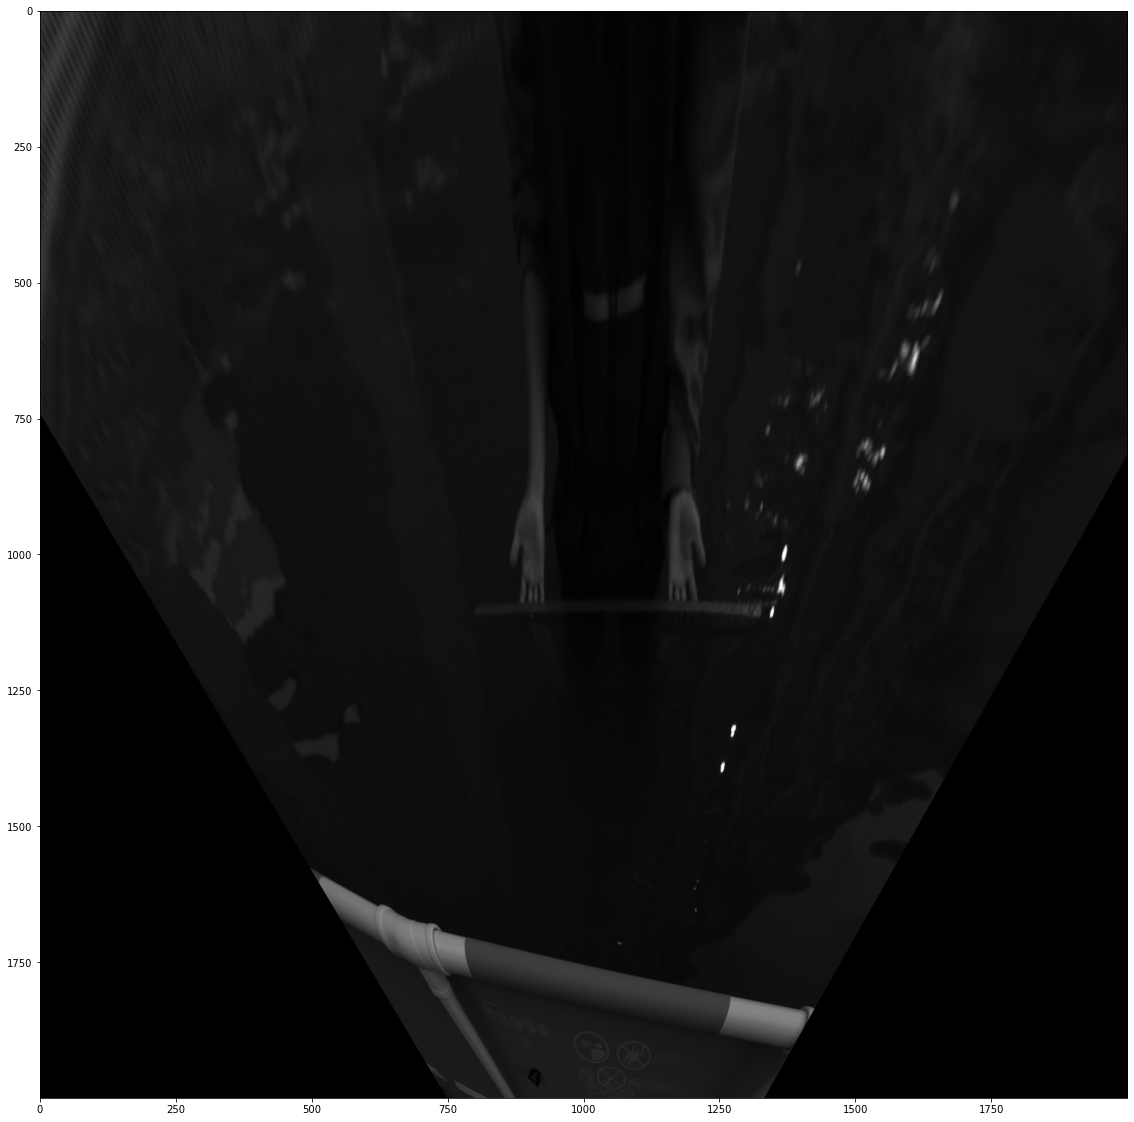

In [35]:
hoge_trans = cv2.warpPerspective(hoge, M, (2000, 2000))
_, ax = plt.subplots(figsize=(20, 20))
ax.imshow(hoge_trans, cmap='gray')

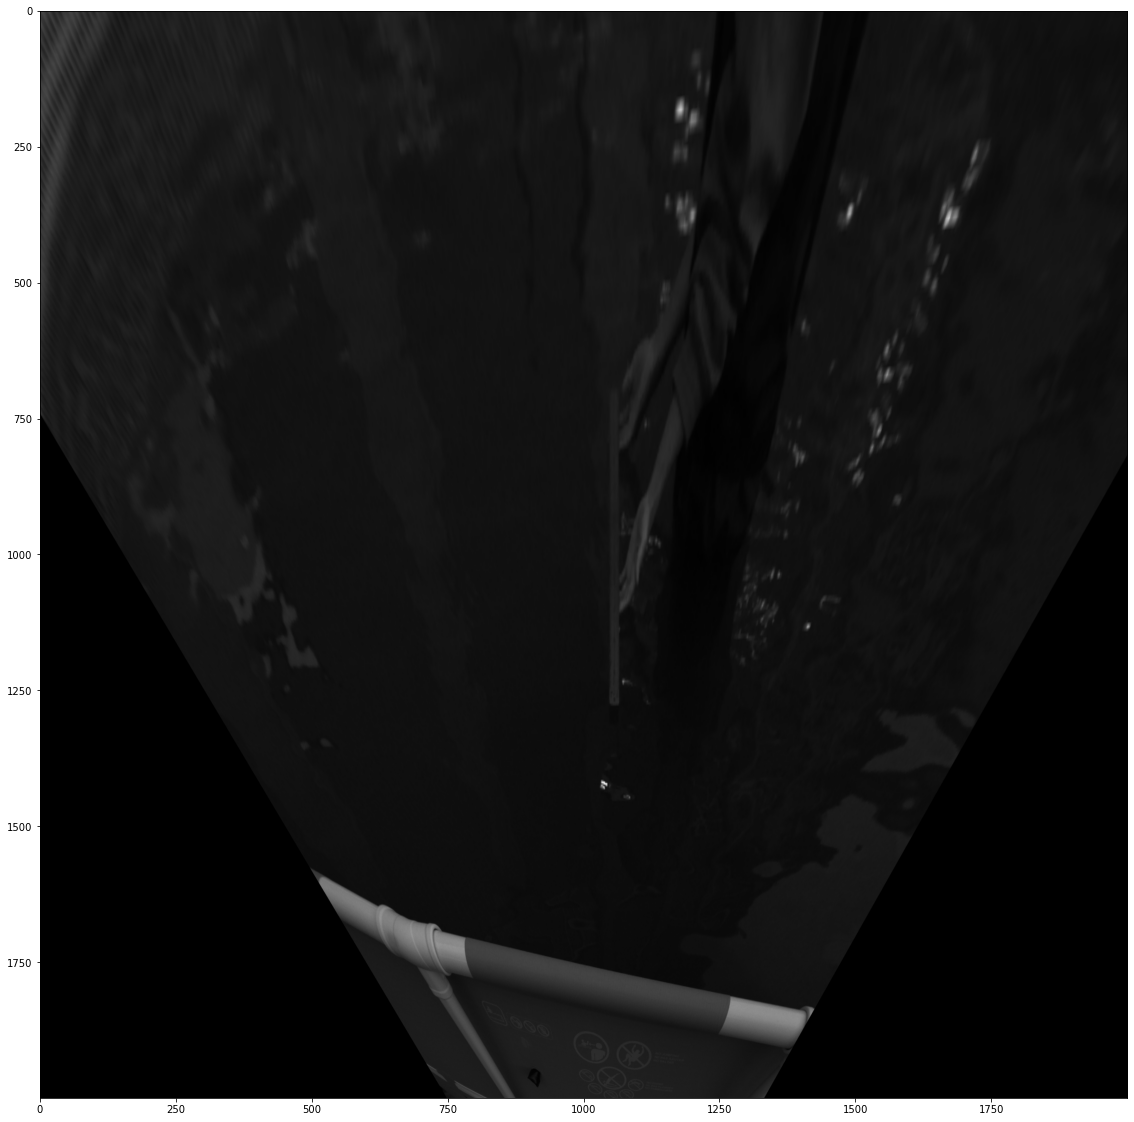

In [36]:
calibration_trans = cv2.warpPerspective(calibration, M, (2000, 2000))
_, ax = plt.subplots(figsize=(20, 20))
ax.imshow(calibration_trans, cmap='gray')

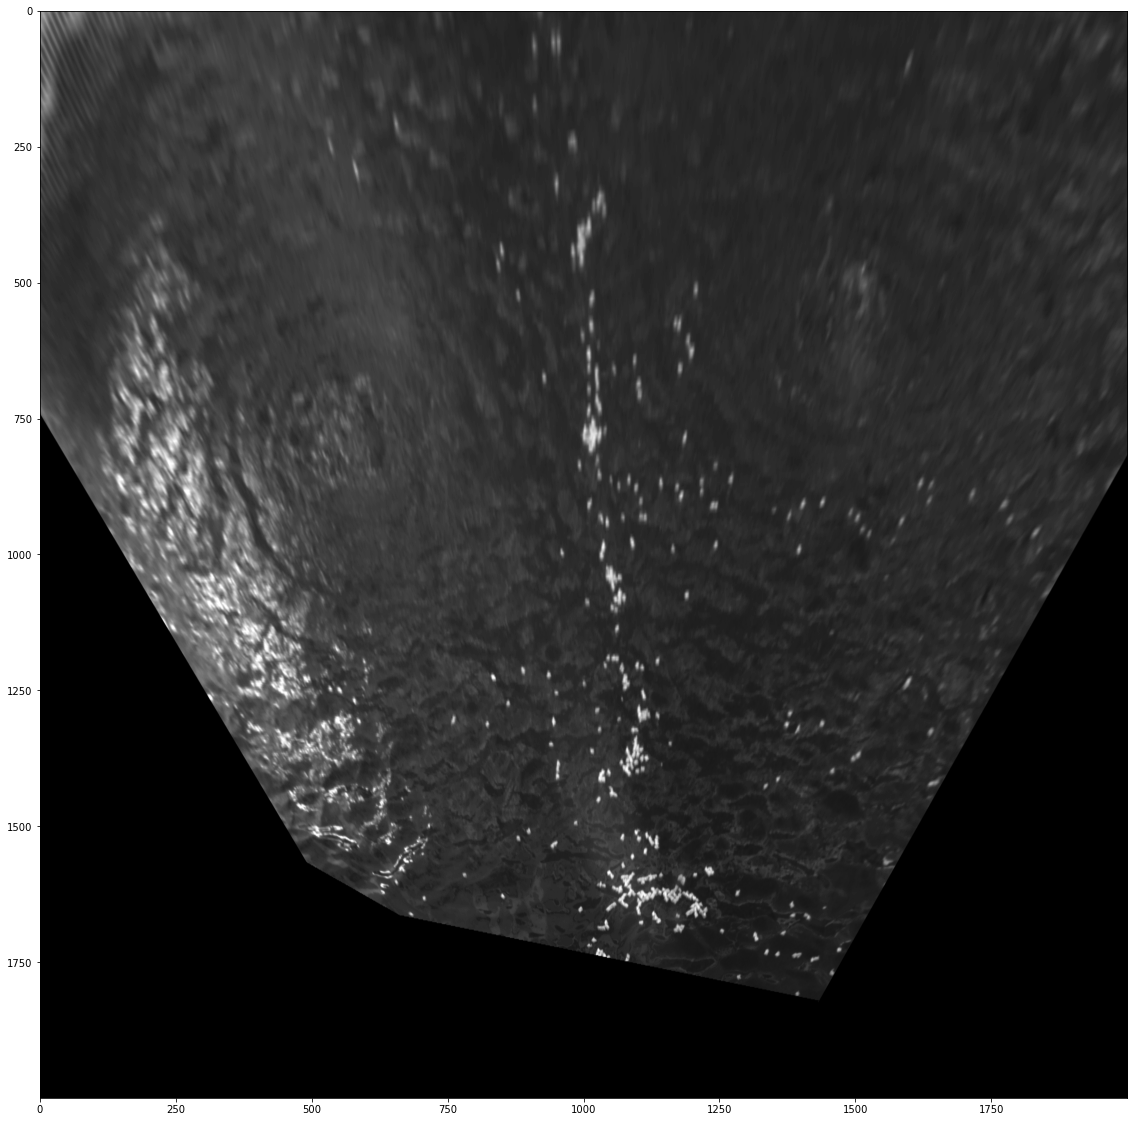

In [37]:
fuga = cv2.imread("a.bmp", 0)
fuga_masked = cv2.bitwise_and(fuga, fuga, mask=mask)
fuga_trans = cv2.warpPerspective(fuga_masked, M, (2000, 2000))
_, ax = plt.subplots(figsize=(20, 20))
ax.imshow(fuga_trans, cmap='gray')

In [38]:
cv2.imwrite("b.bmp", fuga_trans)

True

In [39]:
c = (557, 770)
right = [1463, 630]

In [40]:
np.rad2deg(np.arctan(140/906))

8.784175711622241

-7の方がよさげ

In [41]:
rot_mat = cv2.getRotationMatrix2D(c, -7, 1.0)
rot_img = cv2.warpAffine(fuga_trans, rot_mat, fuga_trans.shape[1::-1])

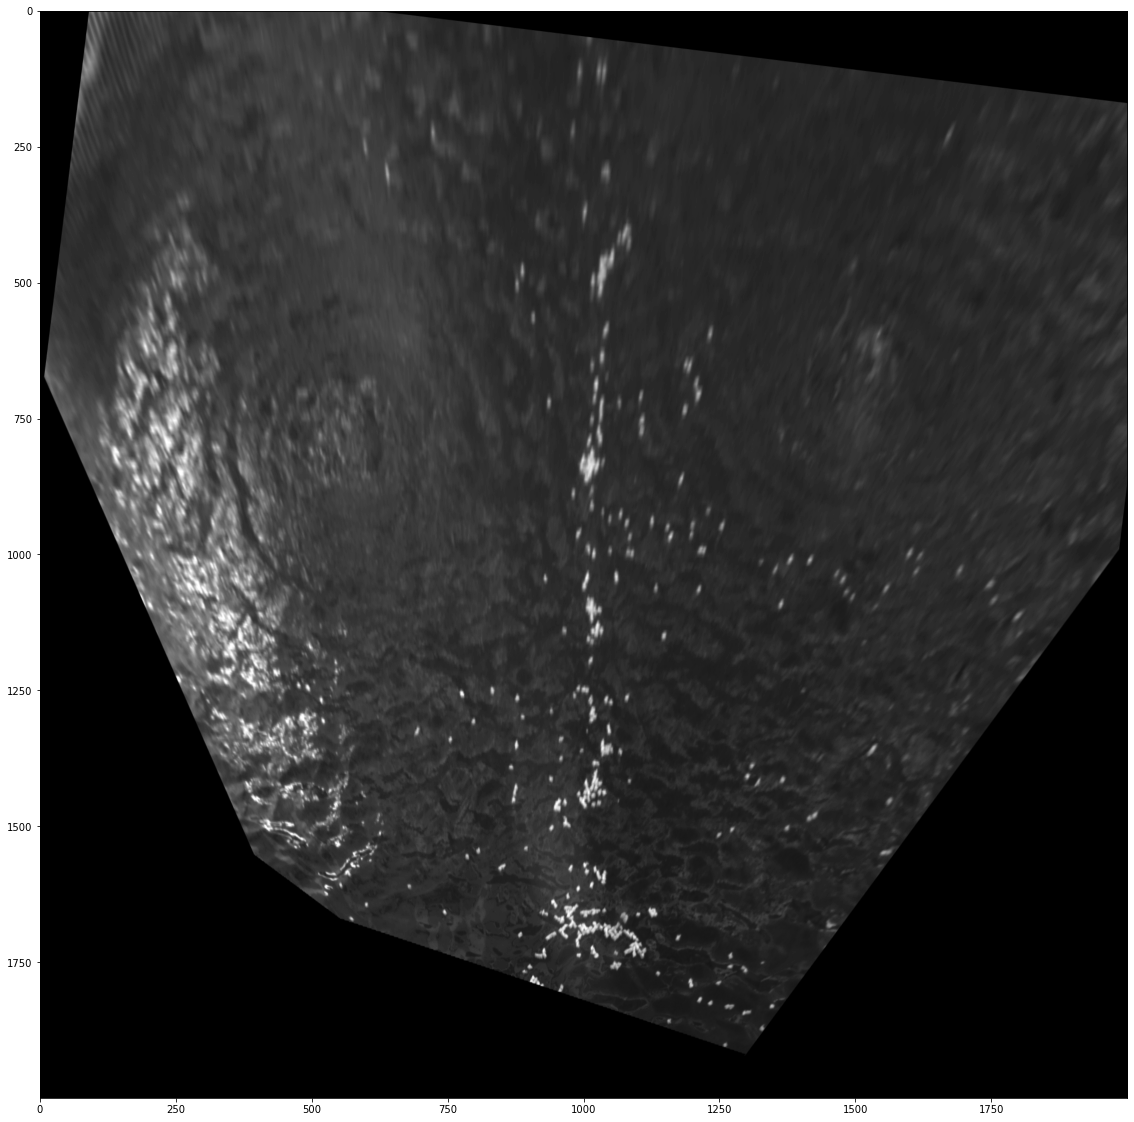

In [42]:
_, ax = plt.subplots(figsize=(20, 20))
ax.imshow(rot_img, cmap='gray')

In [43]:
_, fuga_trans_th = cv2.threshold(rot_img[:, :], 150, 255, cv2.THRESH_BINARY)

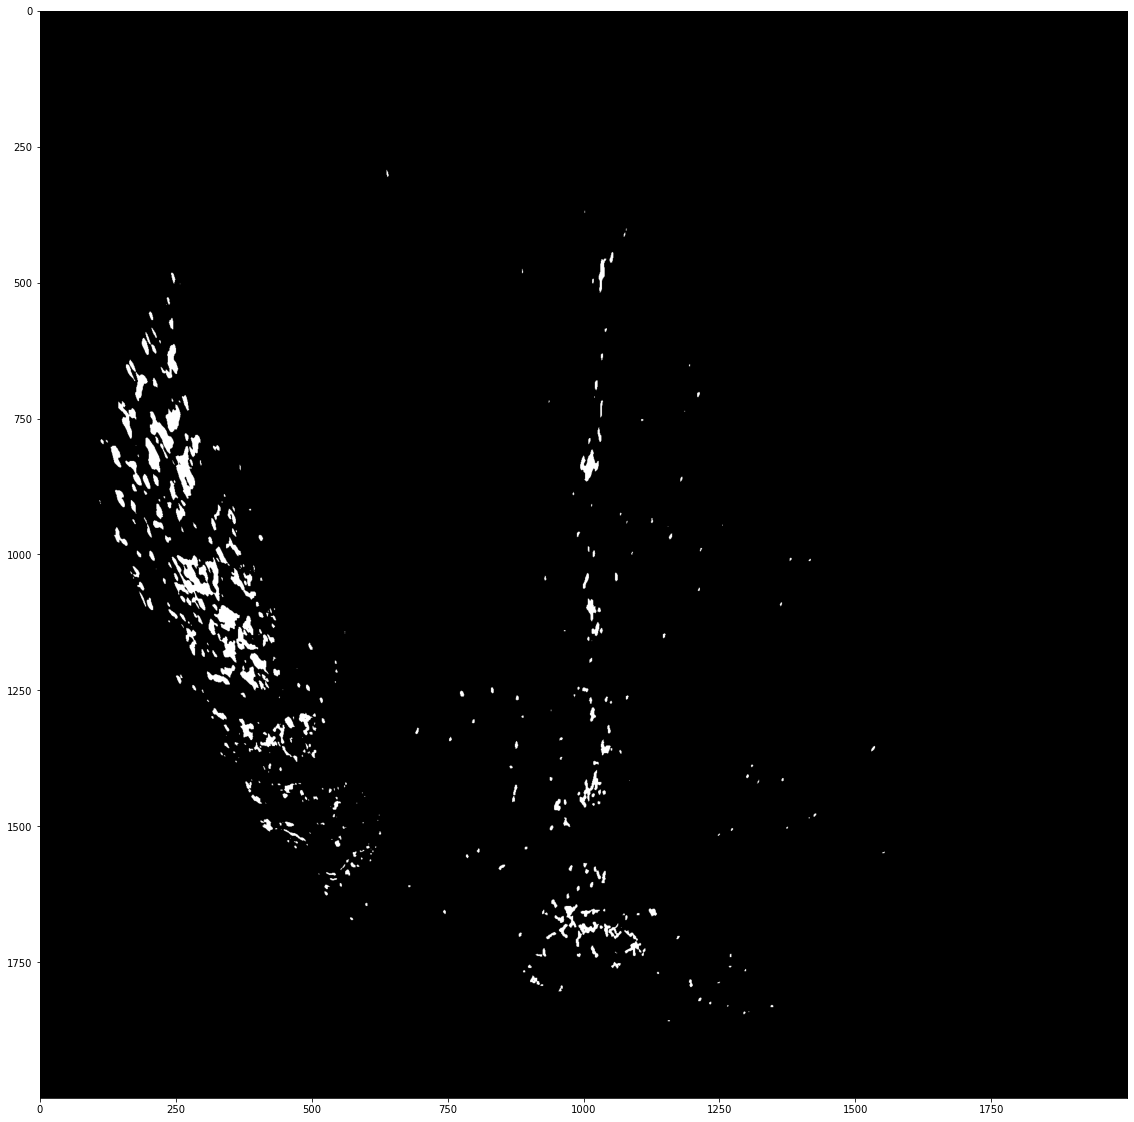

In [44]:
_, ax = plt.subplots(figsize=(20, 20))
ax.imshow(fuga_trans_th, cmap='gray')

In [45]:
fuga_trans_th[:500, :] = 125
fuga_trans_th[1800:, :] = 125
fuga_trans_th[:, :650] = 125

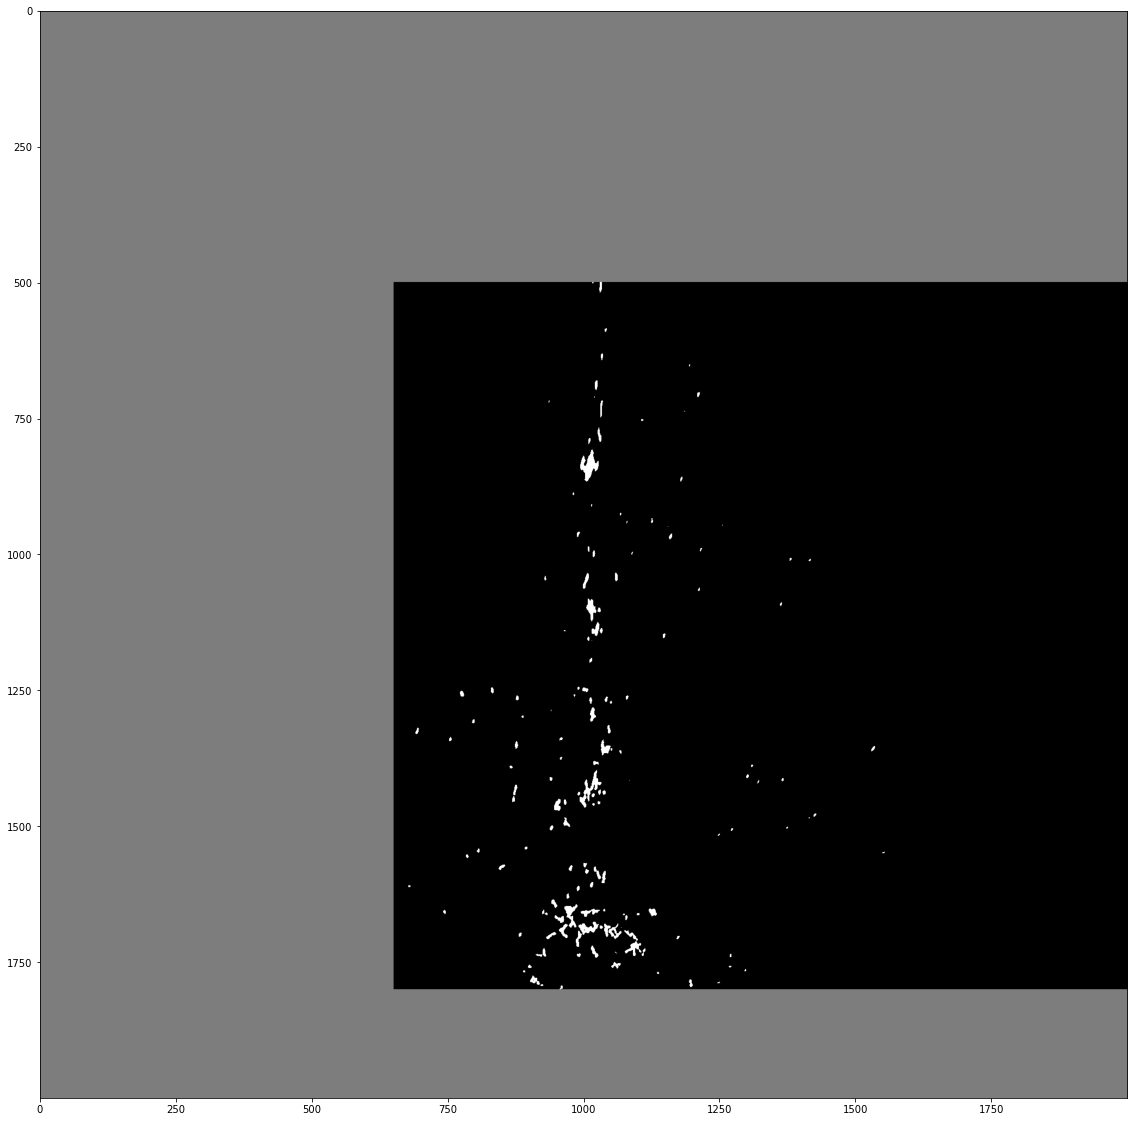

In [46]:
_, ax = plt.subplots(figsize=(20, 20))
ax.imshow(fuga_trans_th, cmap='gray')